In [8]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

from matplotlib import animation
plt.rcParams["animation.html"] = "jshtml"

%matplotlib inline

# Step 1: Set up the problem

Here we will use an advection problem
$$
u_t + c\cdot u_x = 0
$$
with periodic boundary conditions and an interval of $[0,1]$

In [2]:
c = 1.0
T = 1.0 / c # end time

# Step 2: Set up the computational grid

dx will be the grid spacing in $x$

x denotes the grid coordinates

xx denotes really fine grid coordinates

In [158]:
nx = 99
x = np.linspace(0, 1, nx, endpoint=False)
dx = x[1] - x[0]
xx = np.linspace(0, 1, 1000, endpoint=False)

Also define an initial condition

In [159]:
def f(x):
    u = np.zeros(x.shape)
    u[np.intersect1d(np.where(x>0.4), np.where(x<0.6))] = 1.0
    return u

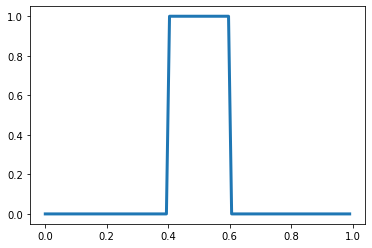

In [160]:
plt.plot(x, f(x), lw=3, clip_on=False)

# Step 3: set up dt:

We need a time step, let's set
$$
\delta t = \lambda \cdot \frac{\delta x}{c}
$$
for some parameter $\lambda$:

In [161]:
lmbda = 0.95
dt = dx * lmbda / c
nt = int(T/dt)
print('T = %g' % T)
print('tsteps = %d' % nt)
print('    dx = %g' % dx)
print('    dt = %g' % dt)
print('lambda = %g' % lmbda)

T = 1
tsteps = 104
    dx = 0.010101
    dt = 0.00959596
lambda = 0.95


# Step 4: make some index vectors

For ease, we can set up some vectors that denote $j$, $j-1$, and $j+1$

In [162]:
J = np.arange(0, nx)  # all vertices
Jm1 = np.roll(J, 1)
Jp1 = np.roll(J, -1)

# 5: run a time stepper

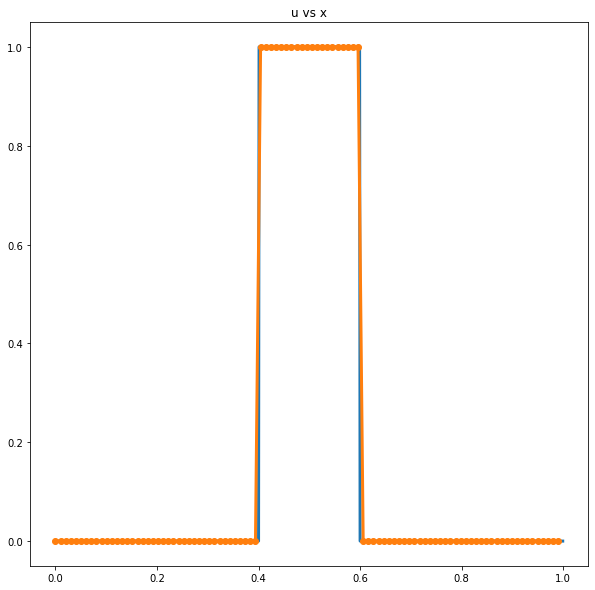

In [163]:
method = 'FTBS'
u = f(x)

fig, ax = plt.subplots(figsize=(10,10))
ax.set_title('u vs x')
line1, = ax.plot(xx, f(xx), lw=3, clip_on=False)
line2, = ax.plot(x, u, '-o', lw=3, clip_on=False)
    
def init_func():
    return (line1, line2)

def timestepper(n, u, J, Jm1, Jp1, lmbda):
    
    if method == 'FTBS':
        u[J] = u[J] - lmbda * (u[J] - u[Jm1])  # FTBS
            
    if method == 'FTFS':
        u[J] = u[J] - lmbda * (u[Jp1] - u[J])  # FTFS
    
    uex = f((xx - c * (n+1) * dt) % 1.0)
        
    line1.set_data(xx, uex)
    line2.set_data(x, u)
    
    return (line1, line2)

anim = animation.FuncAnimation(fig, timestepper,
                               init_func=init_func,
                               frames=nt,
                               fargs=(u, J, Jm1, Jp1, lmbda),
                               interval=20, 
                               blit=True)

In [164]:
anim

# Step 6: Check the error

Let's take a look at $u(x) - f(x - ct)$

0.0819360172319946


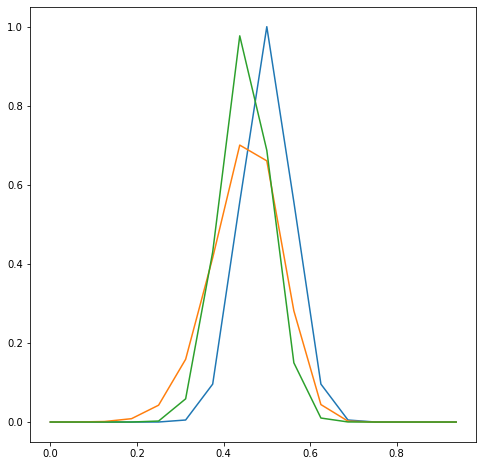

In [201]:
def f(x):
    return np.exp(-(x-0.5)**2*150)

nx = 16
x = np.linspace(0, 1, nx, endpoint=False)
dx = x[1] - x[0]
xx = np.linspace(0, 1, 1000, endpoint=False)
J = np.arange(0, nx)  # all vertices
Jm1 = np.roll(J, 1)
Jp1 = np.roll(J, -1)

lmbda = 0.95
dt = dx * lmbda / c
nt = int(T/dt)
#nt = 16

u = f(x)
for i in range(1,nt+1):
    u[J] = u[J] - lmbda * (u[J] - u[Jm1])  # FTBS

plt.figure(figsize=(8,8))
plt.plot(x, f(x))
plt.plot(x, u)
plt.plot(x, f((x - c * (nt) * dt) % 1.0))

uex = f((x - c * (nt) * dt) % 1.0)
error = u - uex
l2err = np.sqrt(dx * np.sum(error**2))
print(l2err)

In [191]:
dt

0.059375